# 数据科学大作业

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

import random
import pickle

np.random.seed(666)

## 1. 读取数据 & 数据清理

### 1.1 数据读取

In [2]:
df = pd.read_csv('adult.txt')
df.columns = [
    "age", "work_class", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]
print(df.sample(5, random_state=666))

       age work_class  fnlwgt      education  education_num  marital_status  \
37391   36    Private  228652   Some-college             10        Divorced   
23684   24    Private  249046      Bachelors             13   Never-married   
47602   55    Private  173832        Masters             14        Divorced   
3192    71    Private  157909   Some-college             10   Never-married   
22276   39    Private   98776   Some-college             10        Divorced   

               occupation    relationship    race      sex  capital_gain  \
37391   Machine-op-inspct       Own-child   Other     Male             0   
23684        Tech-support       Own-child   White     Male             0   
47602               Sales   Not-in-family   White     Male         10520   
3192        Other-service   Not-in-family   White   Female          2964   
22276     Exec-managerial   Not-in-family   White     Male             0   

       capital_loss  hours_per_week  native_country   income  
37391

### 1.2 数据清理

In [3]:
with open('adult.txt', 'r') as f:
    raw_data = f.readlines()[1:]
    data = []

    for line in raw_data:
        line = line.strip().rstrip(',')
        data.append(line.split(', '))

#print(random.sample(data, 100))
miss = [0] * 5
del_list = []
for i, d in enumerate(data):
    nan = d.count('?')
    if nan > 0:
        del_list.append(i)
        miss[nan] += 1

print(miss)
print(len(del_list))

[0, 821, 2753, 46, 0]
3620


In [6]:
real_data = []
for i, d in enumerate(data):
    if not i in del_list:
        real_data.append(d)
    
print(len(real_data))
with open('real_data.pkl', 'wb') as f:
    pickle.dump(real_data, f)
# for i, d in enumerate(real_data):
#     nan = d.count('?')
#     if nan > 0:
#         print(d)

45222


## 2. 探索各特征的分布

In [44]:
with open('real_data.pkl', 'rb') as f:
    real_data = pickle.load(f)
real_df = pd.DataFrame(real_data)
class_list = [
    "age", "work_class", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]
real_df.columns = class_list

num_feature = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
class_feature = ["work_class", "education", "marital_status", "occupation", "relationship", "race", "sex",
    "native_country", "income"
]

### 2.1 数值特征的数值特征

In [65]:
num_real_df = pd.DataFrame(real_df[num_feature], dtype=np.int32)
num_real_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### 2.2 数值特征的分布图

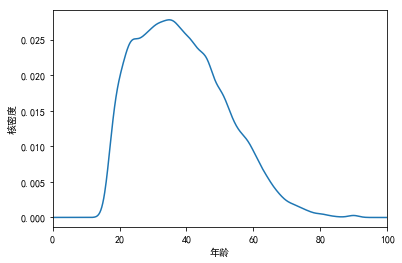

In [61]:
tar_df = num_real_df['age']
plt.figure(figsize=(6, 4))
tar_df.plot(kind='kde')

plt.xlabel(u'年龄')
plt.ylabel(u'核密度')
plt.xlim((0, 100))
plt.savefig('report/img/age_dis')
plt.show()

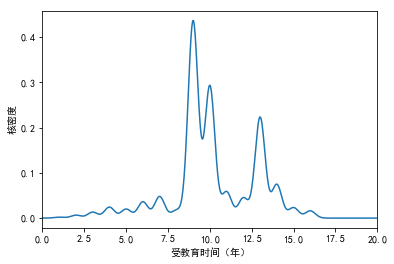

In [62]:
tar_df = num_real_df['education_num']
plt.figure(figsize=(6, 4))
tar_df.plot(kind='kde')

plt.xlabel(u'受教育时间（年）')
plt.ylabel(u'核密度')
plt.xlim((0, 20))
plt.savefig('report/img/edu_num_dis')
plt.show()

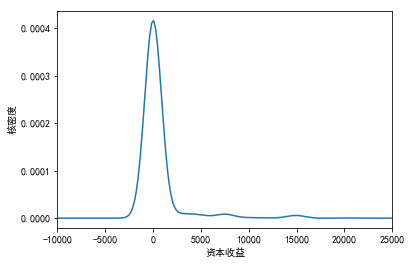

In [66]:
tar_df = num_real_df['capital_gain']
plt.figure(figsize=(6, 4))
tar_df.plot(kind='kde')

plt.xlabel(u'资本收益')
plt.ylabel(u'核密度')
plt.xlim((-10000, 25000))
plt.savefig('report/img/cap_in_dis')
plt.show()

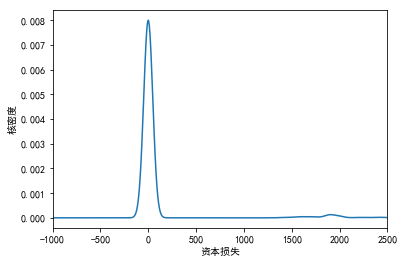

In [64]:
tar_df = num_real_df['capital_loss']
plt.figure(figsize=(6, 4))
tar_df.plot(kind='kde')

plt.xlabel(u'资本损失')
plt.ylabel(u'核密度')
plt.xlim((-1000, 2500))
plt.savefig('report/img/cap_out_dis')
plt.show()

### 2.3 类别数据的分布

In [67]:
class_real_df = real_df[class_feature]
class_real_df.describe()

,work_class,education,marital_status,occupation,relationship,race,sex,native_country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,22654


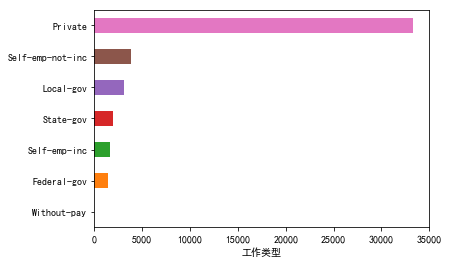

In [68]:
tar_df = class_real_df['work_class']
plt.figure(figsize=(6, 4))
tar_df.value_counts(ascending=True).plot(kind='barh')

plt.xlabel(u'工作类型')
plt.savefig('report/img/work_class_dis')
plt.show()